In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.DEBUG)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 0,
            traj.state_charges.attrs,
        )
    )


# shnitsel_db_single_nx: Trajectory = st.io.read(
#     'test_data/newtonx/test_I01_v2.6/', parallel=False
# )  # type: ignore
shnitsel_db_single_nx: ShnitselDB = st.io.read(
    'test_data/playground/TRAJECTORIES/', parallel=True
)  # type: ignore


# shnitsel_db_single_nx = set_charges(shnitsel_db_single_nx)

# # shnitsel_db_full_newtonx = shnitsel_db_full_newtonx.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db_full_newtonx = shnitsel_db_full.map_over_trajectories(set_charges)
# shnitsel_db_single_nx
# shnitsel_db_single_nx.isel(time=0,state=3).forces

  0%|          | 0/100 [00:00<?, ?it/s]

Rendering coupling page for 7 states with at least 21 relevant state transitions.


100%|██████████| 21/21 [00:00<00:00, 7812.70it/s]


[-2.68660728e-01  1.09977236e-02 -1.10276924e-01  2.31124791e-02
 -1.16110667e-01  3.15249478e-02  2.54472276e-02  4.61506308e-02
  3.01720071e-02 -1.49684227e-01  2.04177439e-02 -1.18120804e-01
 -2.01572458e-03  2.68496353e-04  4.67255655e-02  1.70951833e-02
  2.59328159e-02  2.18429440e-02  3.01567602e-01  2.47891741e-01
  2.95051568e-02  1.14895728e-01  1.58884562e-01  2.14685440e-01
  2.97009470e-01  3.01786730e-01  1.02409711e-01  4.76609033e-02
  2.33634425e-01  1.67683053e-01  3.82815352e-02  1.86429682e-01
  2.40501462e-01  4.99877796e-02  1.17799861e-01  1.82336419e-01
  1.81003220e-01  1.23769232e-01  4.32324692e-02  1.56720259e-01
  7.37780837e-02  1.79784426e-01  2.04816488e-01  6.89505679e-02
  2.03030871e-01]
[ 0.28956318  0.05108203  0.30561086  0.04643042  0.34380643  0.02702793
  0.2124873   0.028915    0.2443123   0.32519692  0.04029221  0.28361459
  0.04228483  0.26712606  0.00479768  0.22716288  0.02086774  0.21502212
 -0.07872852  0.05754692  0.05907918  0.15338423

Written: 100%|██████████| 1/1 [00:03<00:00,  3.21s/page]


Writing pdf with 4 pages


{'/unknown/aggregate of subtree(unknown)': [<Figure size 827x974.167 with 13 Axes>,
  <Figure size 350x350 with 49 Axes>,
  <Figure size 827x1169 with 8 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

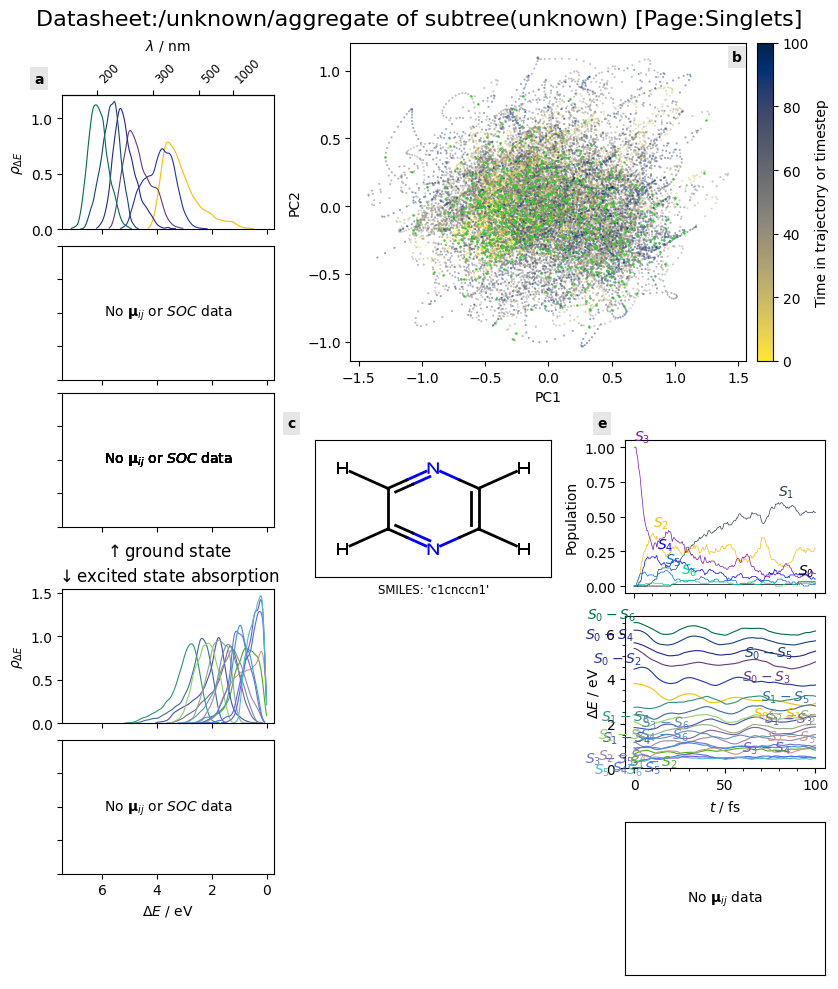

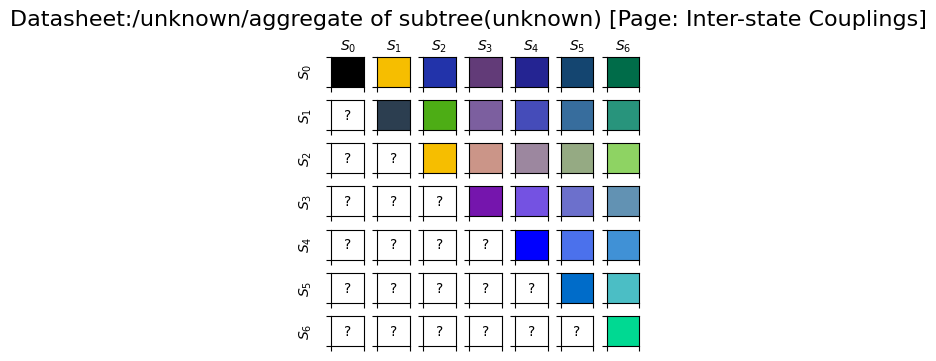

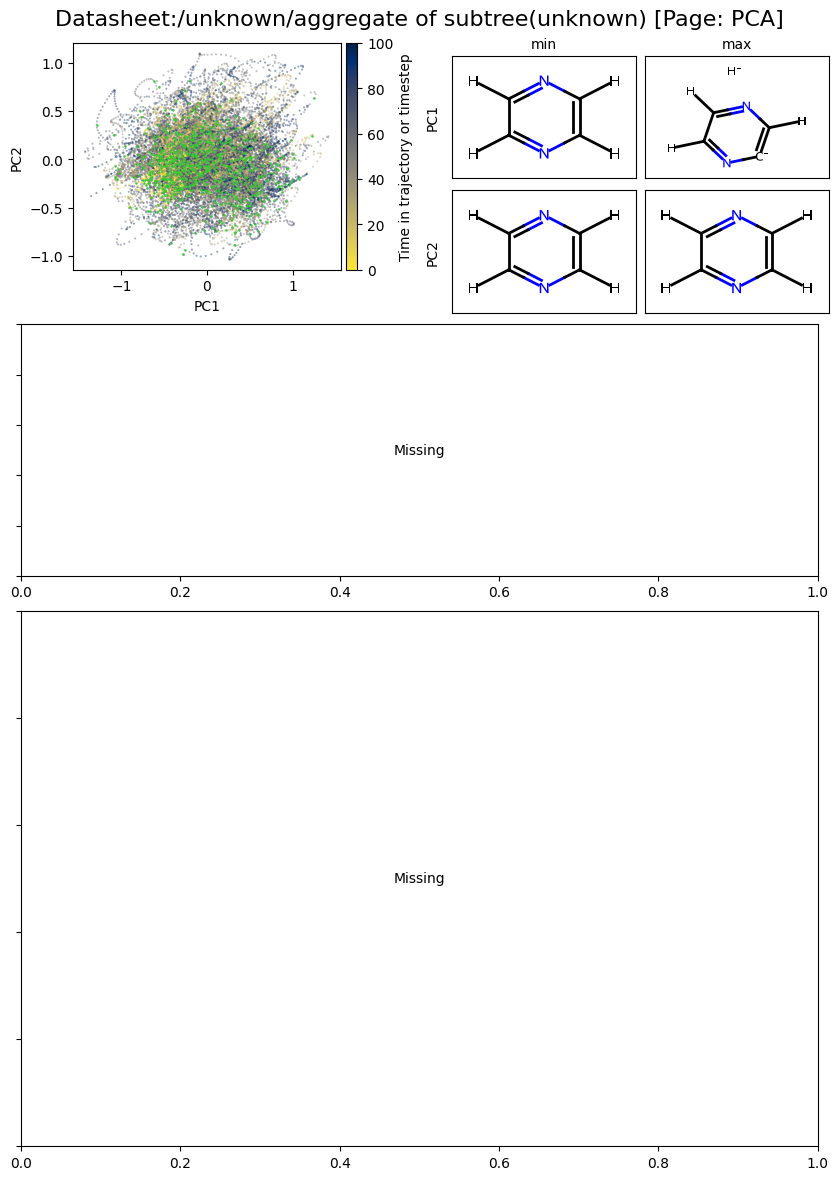

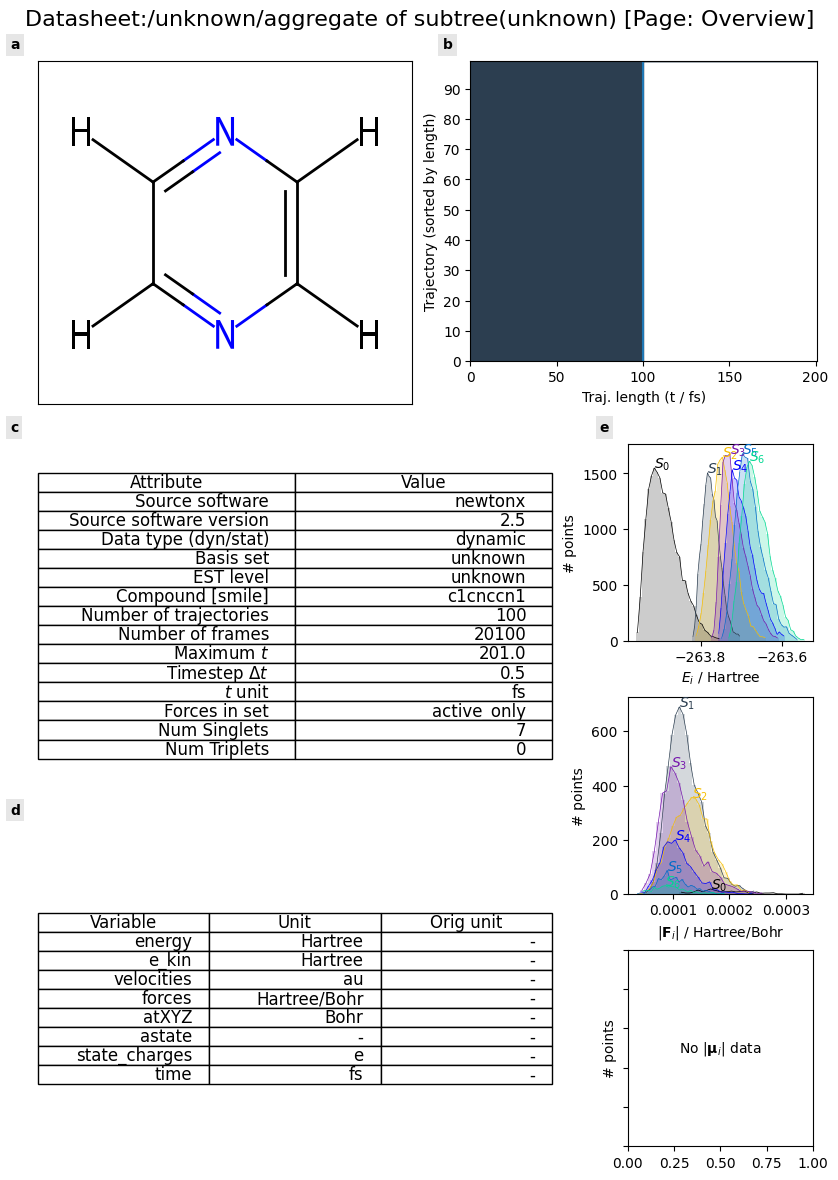

In [3]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_single_nx)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(include_meta_page=True, include_pca_page=True, path="./triplet_newtonx_.pdf")
# sheet.datasheet_pages

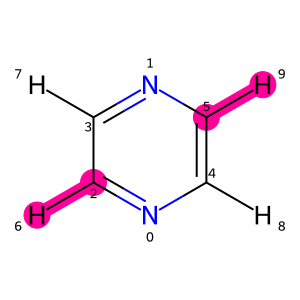

In [41]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame,default_selection=['atoms', 'bonds'])
sel = sel.select_angles([(1,3,7),(0,4,8)])
sel = sel.select_bonds([[2,6],[5,9]])
# sel = sel.select_bonds(["[#6][#7]"])
# sel = sel.select_atoms(["[#6]"])

sel.draw(flag_level=3)
sel.draw(highlight_color=(1,0,.6))


In [ ]:
%time sheet.calc_all()

CPU times: user 429 μs, sys: 6 μs, total: 435 μs
Wall time: 438 μs


In [ ]:
%time sheet.plot_per_state_histograms()

CPU times: user 12 μs, sys: 0 ns, total: 12 μs
Wall time: 13.8 μs


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')